<a href="https://colab.research.google.com/github/jimuelceleste/machine_learning_notes/blob/main/Linear_Regression_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Objective: Fit data ($(x^{(i)}, y^{(i)})$ where $i=1,...,n$) with the linear model.

$$ minimize \frac{1}{n} \sum_{i=1}^n (y_\theta^{(i)} - y^{(i)})^2 $$

Approaches: 
1. Statistics
2. Optimization with Gradient Descent

## Linear Model

$y = \theta_1 + \theta_2 x$ where $y$ is the target variable and $x$ is the predictor; $\theta_1$ (intercept) and $\theta_2$ (slope) are the parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import math
from sklearn.linear_model import LinearRegression

In [2]:
# the linear model
def get_model(theta1, theta2):
    def model(x):
        return theta1 + theta2 * x
    return model 

[0 1 2 3 4 5 6 7 8 9] [ 1  3  5  7  9 11 13 15 17 19]


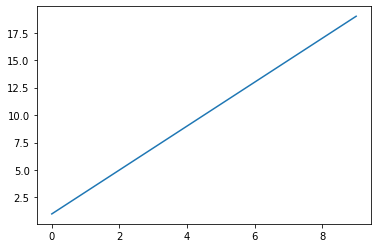

In [3]:
# model
theta1 = 1
theta2 = 2
model = get_model(theta1, theta2)

# predictor 
x = np.arange(10)

# target 
y = model(x)

print(x, y)
plt.plot(x, y)

## Cost Function (J): Mean Squared Error 
$J(\theta_1, \theta_2) = \frac{1}{n} \sum_{i=1}^n (y_\theta^{(i)} - y^{(i)})^2$ where n is the size of the dataset, $y_\theta$ is the hypothesis function, $y$ is the target data, $i$ is the ith element. 


In [4]:
def mse(predicted, y, n):
    return sum((predicted-y)**2) / n

## Synthetic Data



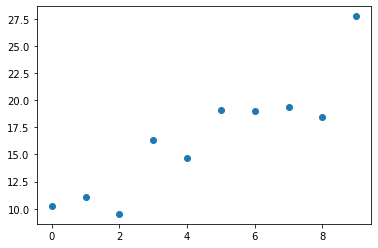

In [5]:
# synthetic data
n = len(x)
noise = np.random.random([n])
intensity = 10
y_noisy = y + noise * intensity

plt.scatter(x, y_noisy)

## Approach 1: Statistics 

Read: [Linear regression and gradient descent for absolute beginners](https://towardsdatascience.com/linear-regression-and-gradient-descent-for-absolute-beginners-eef9574eadb0#:~:text=in%20linear%20regression.-,Gradient%20descent%20is%20an%20algorithm%20that%20approaches%20the%20least%20squared,one%20set%20of%20x%20values)

We can use statistics (standard deviation, mean, correlation coefficient) to estimate the parameters of a linear model to fit a dataset: $\theta_2 = r \frac{STD(y)}{STD(x)} $ where $r$ is the correlation coefficient between x and y and SD is the standard deviation. 

In [6]:
# Demonstrating this for the same dataset above: noisy y 
std_x = np.std(x) 
std_y_noisy = np.std(y_noisy) 
r,_ = pearsonr(x, y_noisy)
theta2_estimate = r * (std_y_noisy / std_x)
print(std_x, std_y_noisy, r, theta2_estimate)

2.8722813232690143 5.209202566865254 0.9042415872274471 1.6399429815915565


$\Rightarrow y = \theta_1 + 1.64 x$

What is $\theta1$? "We know that the regression line crosses the point of averages, so one point on the line is (average of x values, average of y values) ([Source](https://towardsdatascience.com/linear-regression-and-gradient-descent-for-absolute-beginners-eef9574eadb0#:~:text=in%20linear%20regression.-,Gradient%20descent%20is%20an%20algorithm%20that%20approaches%20the%20least%20squared,one%20set%20of%20x%20values))."

$\theta_1 = y - 1.64 x$

In [8]:
mean_x = np.mean(x)
mean_y_noisy = np.mean(y_noisy)
theta1_estimate = mean_y_noisy - theta2_estimate * mean_x
print(mean_x, mean_y_noisy, theta1_estimate)

4.5 16.559896694573514 9.18015327741151


$\Rightarrow y = 9.18 + 1.64 x$

theta1, theta2 = 9.18015327741151 1.6399429815915565


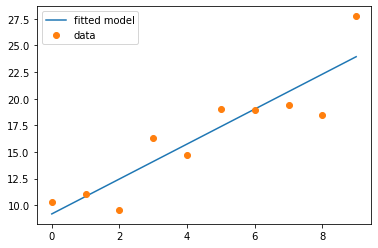

In [9]:
# model
model_pred = get_model(theta1_estimate, theta2_estimate)

# predictor 
x = np.arange(10)

# target 
y_pred = model_pred(x)

print("theta1, theta2 =", theta1_estimate, theta2_estimate)
plt.plot(x, y_pred, '-', label='fitted model')
plt.plot(x, y_noisy, 'o', label='data')
plt.legend()

In [10]:
# MSE
print("Cost, MSE:", mse(y_pred, y_noisy, n))
print("RMSE:", mse(y_pred, y_noisy, n) ** (1/2))

Cost, MSE: 4.948134273946462
RMSE: 2.2244402158625127


## Approach 2: Gradient Descent

$ \theta_{new} = \theta_{old} - \alpha \nabla F(\theta_{old})$

1. Guess $\theta$ 
2. Compute cost $J$ 
3. Update $\theta$ 
    - $\theta_{1\ new} = \theta_{1\ old} - \alpha (\frac{1}{m}) \sum_{i=1}^m (h_{\theta}(x^{(i)})- y^{(i)})$
    -  $\theta_{2\ new} = \theta_{2\ old} - \alpha (\frac{1}{m}) \sum_{i=1}^m (h_{\theta}(x^{(i)})- y^{(i)}) (x^{(i)})$
4. Repeat 2 and 3 until convergence 

iterations before convergence: 1269
theta1, theta2 = [8.93401404489383, 1.6791959698539898]
Cost, MSE: 4.965676209081013
RMSE: 2.2283797273088384


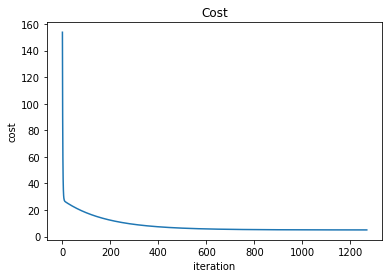

In [12]:
# initial guess
theta1 = 0 
theta2 = 1
model = get_model(theta1, theta2)

# cost: largest number in Python 
cost = math.inf
cost_list = [cost]

# step size (alpha), tolerance (defines convergence)
step_size = 0.01
tolerance = 0.0001 # 3 decimal points
convergence = False

while not convergence: 
    new_cost = mse(model(x), y_noisy, n)
        
    if np.abs(new_cost - cost) <= tolerance: 
        convergence = True
    else: 
        cost = new_cost 
        theta1 = theta1 - step_size * (1 / n) * np.sum(model(x) - y_noisy)
        theta2 = theta2 - step_size * (1 / n) * np.sum((model(x) - y_noisy) * x)
        model = get_model(theta1, theta2)

    cost_list.append(cost)

print("iterations before convergence:", len(cost_list))
print("theta1, theta2 =", [theta1, theta2])
print("Cost, MSE:", mse(model(x), y_noisy, n))
print("RMSE:", mse(model(x), y_noisy, n) ** (1/2))

plt.title("Cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.plot(np.arange(len(cost_list)), cost_list)

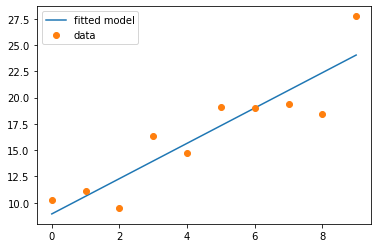

In [13]:
y_pred = model(x)

plt.plot(x, y_pred, '-', label='fitted model')
plt.plot(x, y_noisy, 'o', label='data')
plt.legend()

## Linear Regression with scikit-learn

Class: [sklearn.linear_model.LinearRegression ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Fitting Method: LinearRegression().fit(X, y) where X is the training data and y is the target values.

In [18]:
model_sklearn = LinearRegression().fit(x.reshape(-1, 1), y_noisy)
model_sklearn.score(x.reshape(-1, 1), y_noisy)

0.8176528480716129

In [19]:
print(model_sklearn.coef_, model_sklearn.intercept_)

[1.63994298] 9.180153277411508


In [21]:
y_pred = model_sklearn.predict(x.reshape(-1, 1))
y_pred

array([ 9.18015328, 10.82009626, 12.46003924, 14.09998222, 15.7399252 ,
       17.37986819, 19.01981117, 20.65975415, 22.29969713, 23.93964011])

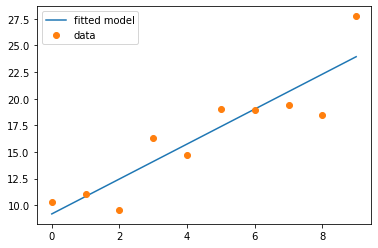

In [22]:
plt.plot(x, y_pred, '-', label='fitted model')
plt.plot(x, y_noisy, 'o', label='data')
plt.legend()